In [39]:

import pandas as pd 
import os 
from datetime import datetime 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
current_directory = os.getcwd()
print(current_directory)
# date = datetime.now().strftime("%Y%m%d")
# pi = pd.read_excel('Data/raw/LUAD Clinical Data.xlsx')

# Get current directory
current_directory = os.getcwd()
data_path = current_directory + '/Data/'

# Set path 
df = pd.read_csv(f"{data_path}/clustered/full_cd_clus_20_40_49.csv").rename(columns={'cluster': 'agglomerateto_275'})
df_loc = pd.read_csv(f"{data_path}/celldata/celldata_20240313.csv")[['cellID', 'Location_Center_X', 'Location_Center_Y']].rename(columns={'cellID': 'source_ID', 'cluster': 'agglomerateto_275'})

# Merge location data 
df_full= pd.merge(df, df_loc, on='source_ID', how='inner')


c:\Users\jhroe\Desktop\Thesis\Clean\CellularCommunityAnalysisNSCLC\Sorin


,Patient_ID,agglomerateto_40,surv_5y
0,LUAD_D001,27,1
1,LUAD_D001,27,1
2,LUAD_D001,27,1
3,LUAD_D001,27,1
4,LUAD_D001,27,1
...,...,...,...
1637717,LUAD_D213,19,1
1637718,LUAD_D213,19,1
1637719,LUAD_D213,19,1
1637720,LUAD_D213,19,1


In [53]:
treg_clusters_40 = [28, 26, 27, 37, 5, 24, 34, 22, 39, 12]
data = df_full[['Patient_ID', 'agglomerateto_40', 'surv_5y']]
data

,Patient_ID,agglomerateto_40,surv_5y
0,LUAD_D001,27,1
1,LUAD_D001,27,1
2,LUAD_D001,27,1
3,LUAD_D001,27,1
4,LUAD_D001,27,1
...,...,...,...
1637717,LUAD_D213,19,1
1637718,LUAD_D213,19,1
1637719,LUAD_D213,19,1
1637720,LUAD_D213,19,1


In [ ]:
count_df = data.groupby(['Patient_ID','source_ID','source_cluster', 'target_cluster']).size().reset_index(name='count')
total_counts_scid = count_df.groupby(['Patient_ID','source_ID','source_cluster'])['count'].sum().reset_index(name='total_scid')

In [23]:
count_data = data.groupby(['Patient_ID', 'agglomerateto_40', 'surv_5y']).size().reset_index(name='count')
total_clus = count_data.groupby(['Patient_ID', 'surv_5y'])['count'].sum().reset_index(name='total_clus')

count_data

,Patient_ID,agglomerateto_40,surv_5y,count
0,LUAD_D001,1,1,12
1,LUAD_D001,2,1,3
2,LUAD_D001,3,1,81
3,LUAD_D001,4,1,198
4,LUAD_D001,5,1,1378
...,...,...,...,...
13251,LUAD_D416,36,1,7
13252,LUAD_D416,37,1,13
13253,LUAD_D416,38,1,10
13254,LUAD_D416,39,1,177


In [26]:
count_df = pd.merge(count_data, total_clus, on=['Patient_ID','surv_5y'])
# totalscid = count_df['total_scid']
# print(count_df.head())
count_df['relative_frequency'] = (count_df['count'] / count_df['total_clus'])
count_df

,Patient_ID,agglomerateto_40,surv_5y,count,total_clus,relative_frequency
0,LUAD_D001,1,1,12,4517,0.002657
1,LUAD_D001,2,1,3,4517,0.000664
2,LUAD_D001,3,1,81,4517,0.017932
3,LUAD_D001,4,1,198,4517,0.043834
4,LUAD_D001,5,1,1378,4517,0.305070
...,...,...,...,...,...,...
13251,LUAD_D416,36,1,7,2879,0.002431
13252,LUAD_D416,37,1,13,2879,0.004515
13253,LUAD_D416,38,1,10,2879,0.003473
13254,LUAD_D416,39,1,177,2879,0.061480


In [59]:
count_df['agglomerateto_40'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 33, 34, 35, 36, 37, 38, 39,
       40, 18, 28, 10, 29, 32], dtype=int64)

In [63]:
boxplot_df = count_df.loc[count_df['agglomerateto_40'].isin(treg_clusters_40)][['Patient_ID', 'agglomerateto_40', 'surv_5y', 'relative_frequency']]
# boxplot_df
boxplot_df['agglomerateto_40'].unique()

array([ 5, 12, 22, 24, 26, 27, 34, 37, 39, 28], dtype=int64)

In [62]:
# boxplot_df = boxplot_df.loc[boxplot_df['agglomerateto_40'].isin(treg_clusters_40)]


array([ 5, 12, 22, 24, 26, 27, 34, 37, 39, 28], dtype=int64)

c:\Users\jhroe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


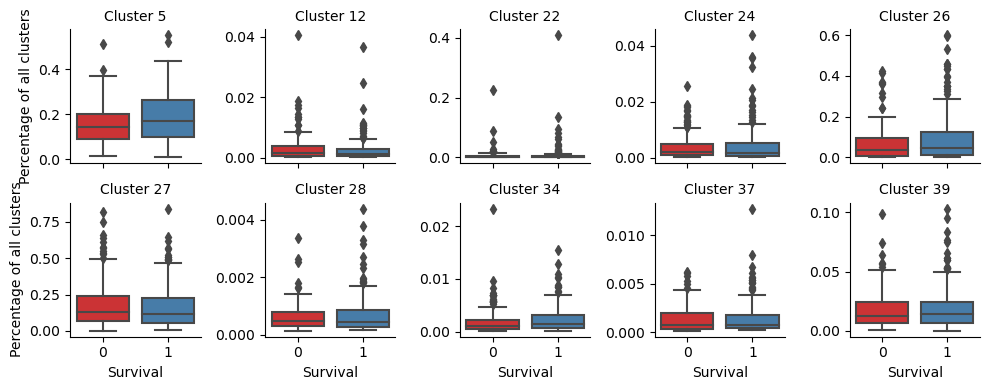

<Figure size 640x480 with 0 Axes>

In [68]:
# Plot using Seaborn
# sns.set(style="whitegrid")
g = sns.FacetGrid(boxplot_df, col="agglomerateto_40", col_wrap=5, height=2, sharey=False)
g.map_dataframe(sns.boxplot, x="surv_5y", y="relative_frequency", palette="Set1")
g.set_axis_labels("Survival", "Percentage of all clusters")
g.set_titles("Cluster {col_name}")
plt.show()
plt.savefig(f'{data_path}plots/boxplot_toptregclus_clus40.png', bbox_inches='tight', dpi=300)
